In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('ted_talks_en.csv')

In [4]:
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


## Exploring and cleaning data

In [5]:
data['length'] = data['transcript'].str.len()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
data.shape

(4005, 20)

### Check missing value

In [8]:
data.isna().any()

talk_id           False
title             False
speaker_1         False
all_speakers       True
occupations        True
about_speakers     True
views             False
recorded_date      True
published_date    False
event             False
native_lang       False
available_lang    False
comments           True
duration          False
topics            False
related_talks     False
url               False
description       False
transcript        False
length            False
dtype: bool

### มี All_speaker, Occupations, about_speakers, recorded_date, comments ที่ภายในข้อมูลมี NaN (ข้อมูลที่ว่าง) 

## Length transcript distribution 

<AxesSubplot:>

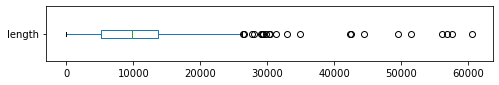

In [9]:
data['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

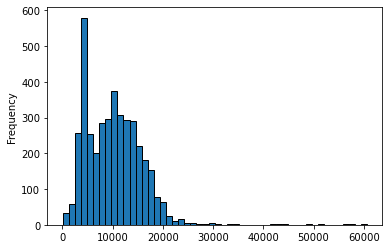

In [10]:
data['length'].plot(kind='hist', bins=50, figsize=(6, 4), edgecolor='k')

### การกระจายตัวของความยาวคำที่เป็น Transcript ของผู้พูดนั้นมีการกระจายตัวแบบ Bimodal distribution

## Word Cloud

In [16]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import re

In [17]:
data['topics'][0]

"['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"

In [18]:
def re_format(text):
    
    remove_space = re.sub(' ','',text)
    remove_quote = re.sub("'",'',remove_space)
    final = re.sub(r'\[(?:[^\]|]*\|)?([^\]|]*)\]', r'\1', remove_quote) #Remove square bracket and keep text
    
    return final

In [19]:
testing = re_format(data['topics'][0]) #test
testing

'alternativeenergy,cars,climatechange,culture,environment,globalissues,science,sustainability,technology'

In [20]:
data['topics'] = data['topics'].apply(re_format)

In [21]:
data['topics']

0       alternativeenergy,cars,climatechange,culture,e...
1       Africa,Asia,Google,demo,economics,globalissues...
2       computers,entertainment,interfacedesign,media,...
3       MacArthurgrant,activism,business,cities,enviro...
4       children,creativity,culture,dance,education,pa...
                              ...                        
4000    activism,data,technology,mentalhealth,software...
4001    TED-Ed,education,history,animation,intelligenc...
4002                society,law,policy,justicesystem,TEDx
4003    TED-Ed,education,animation,UnitedStates,women,...
4004    animals,TED-Ed,animation,oceans,science,educat...
Name: topics, Length: 4005, dtype: object

## tokenize with lower_text

In [22]:
def tokenize(text):
    text = text.lower()
    word = re.findall(r'[\w]+', str(text))
    #word = text.split(',')
    return word

In [23]:
data['topic_tokens'] = data['topics'].apply(tokenize)

In [24]:
data['topic_tokens'][0]

['alternativeenergy',
 'cars',
 'climatechange',
 'culture',
 'environment',
 'globalissues',
 'science',
 'sustainability',
 'technology']

In [25]:
topics_tokens = data['topic_tokens'].explode().values
topics_tokens

array(['alternativeenergy', 'cars', 'climatechange', ..., 'education',
       'biology', 'climatechange'], dtype=object)

In [26]:
topic_count = Counter(topics_tokens)

In [27]:
topic_count.most_common(15)

[('science', 998),
 ('technology', 979),
 ('culture', 680),
 ('tedx', 581),
 ('globalissues', 574),
 ('ted', 563),
 ('ed', 563),
 ('society', 557),
 ('design', 518),
 ('socialchange', 512),
 ('animation', 487),
 ('business', 443),
 ('health', 442),
 ('history', 406),
 ('education', 390)]

In [28]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

(-0.5, 799.5, 399.5, -0.5)

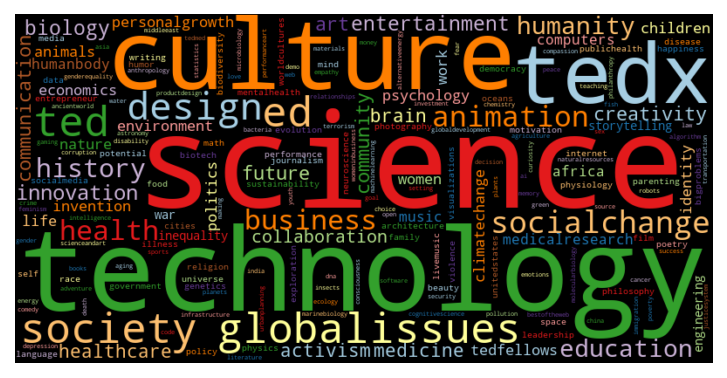

In [29]:
wc.generate_from_frequencies(topic_count)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [30]:
data['url'][1]

'https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen/'

In [31]:
data['description'][1]

'You\'ve never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called "developing world."'

In [32]:
data['transcript'][1][0:500]

'About 10 years ago, I took on the task to teach global development to Swedish undergraduate students. That was after having spent about 20 years, together with African institutions, studying hunger in Africa. So I was sort of expected to know a little about the world. And I started, in our medical university, Karolinska Institute, an undergraduate course called Global Health. But when you get that opportunity, you get a little nervous. I thought, these students coming to us actually have the hig'

## หา HTML tags ที่เป็นไปได้ว่าจะมีในข้อมูล

In [33]:
def find_tag_pattern(text):
    group = set(re.findall(r'<\w+',text))
    final = str(group)
    return final

In [34]:
finding = data['transcript'].apply(find_tag_pattern)

In [35]:
List_tag = []
for i in finding:
    List_tag.append(str(i))

In [36]:
List_tag = set(List_tag)

In [37]:
List_tag

{'set()'}

### พบว่าไม่มี HTML tags ใน transcript ส่วนมากที่พบจะเป็นตัวอักขระพิเศษซึ่งก็คือ \ , . ; - '

In [24]:
from nltk import stem
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

### Cleaning function
1.ปรับตัวอักษรให้เป็นพิมพ์เล็กทั้งหมด

2.ลบตัวอักขระพิเศษทั้งหมดที่เป็นไปได้

3.ลบคำ stopwords ของตัว content

4.Normalize text ด้วยวิธี Lemmatization

In [28]:
replace_symbols = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))
wnl = stem.WordNetLemmatizer()

def cleaning_text(text):
    text = text.lower()
    text = replace_symbols.sub(' ',text)
    text = bad_symbols.sub('',text)
    text = text.split()
    lemmatize_txt = [wnl.lemmatize(word) for word in text
                     if not word in stop_words]
    final_text = ' '.join(lemmatize_txt)
    return final_text

In [121]:
cleaning_text(data['transcript'][1])[0:400] #Test

'10 year ago took task teach global development swedish undergraduate student spent 20 year together african institution studying hunger africa sort expected know little world started medical university karolinska institute undergraduate course called global health get opportunity get little nervous thought student coming u actually highest grade get swedish college system thought maybe know everyt'

In [122]:
data['content'] = data['description'] + ' ' + data['transcript']

In [126]:
data['description'][0]

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.'

In [129]:
data['transcript'][0][0:400]

"Thank you so much, Chris. And it's truly a great honor to have the opportunity to come to this stage twice; I'm extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that. (Laughter) Put yourselves in my position. (Laughter) I flew o"

In [124]:
data['content'][0][0:500]

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming. Thank you so much, Chris. And it\'s truly a great honor to have the opportunity to come to this stage twice; I\'m extremely grateful. I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other'

## Apply cleaning function

In [130]:
data['content'] = data['content'].apply(cleaning_text)

In [174]:
data['content'][0][0:500]

'humor humanity exuded inconvenient truth al gore spell 15 way individual address climate change immediately buying hybrid inventing new hotter brand name global warming thank much chris truly great honor opportunity come stage twice im extremely grateful blown away conference want thank many nice comment say night say sincerely partly mock sob need laughter put position laughter flew air force two eight year laughter take shoe boot get airplane laughter applause ill tell one quick story illustra'

## TF-IDF

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.5, max_features=2000,
                                 min_df=2,
                                 use_idf=True)
tfidf_matrix = vectorizer.fit_transform(data['content'])
tfidf_feature_names = vectorizer.get_feature_names()

In [147]:
tfidf_matrix

<4005x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 991228 stored elements in Compressed Sparse Row format>

In [152]:
vectorizer.get_feature_names()[1000:1050] # sample

['killed',
 'killing',
 'kilometer',
 'king',
 'kitchen',
 'knew',
 'knowing',
 'knowledge',
 'known',
 'la',
 'lab',
 'labor',
 'laboratory',
 'lack',
 'lady',
 'land',
 'landscape',
 'language',
 'large',
 'larger',
 'largest',
 'late',
 'later',
 'laugh',
 'launch',
 'launched',
 'law',
 'lawyer',
 'lay',
 'layer',
 'le',
 'lead',
 'leader',
 'leadership',
 'leading',
 'leaf',
 'learn',
 'learned',
 'learning',
 'least',
 'leave',
 'leaving',
 'led',
 'left',
 'leg',
 'legal',
 'lesson',
 'letter',
 'level',
 'library']

In [153]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.02215293, 0.        ,
        0.        ],
       [0.01067735, 0.03161583, 0.03967918, ..., 0.01184256, 0.        ,
        0.        ],
       [0.01248964, 0.01232734, 0.        , ..., 0.04155785, 0.        ,
        0.        ],
       ...,
       [0.05241319, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02249578, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Fit to LDA

In [169]:
from sklearn.decomposition import NMF, LatentDirichletAllocation


# Run LDA
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', 
                                learning_offset=50.,random_state=0).fit(tfidf_matrix)

In [175]:
def show_topics(model, feature_names, words_represent_length):
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_index+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-words_represent_length - 1:-1]]))

words_represent_length = 30
show_topics(lda, tfidf_feature_names, words_represent_length)

Topic 1:
woman brain story child city system music country water school body question love technology cell feel percent data number family kid community ive word weve home together space started light
Topic 2:
religion religious design push god happiness attack heart success money happy assumption id compassion serve tradition course dollar ted designer interview patient faith rule device american practice book fun capital
Topic 3:
song love word car language summer tree warming guy computer paper cave okay wild oh modern camera cool park interface anderson chris ok physic engineer sometimes story id worry happy
Topic 4:
cell beauty video truth software fire apple biology language window walk shop volunteer feature gift month screen power movie hospital walking surgeon none ok chris learning word call free using
Topic 5:
africa country aid force woman opportunity african dollar child film business continent percent million technology sector economy kid co2 building move skin law market

## Topics analysis

Topic 1 : มีการพูดถึงในเรื่องเกี่ยวเด็ก และสังคมการใช้ชีวิตในครอบครัว การเรียนรู้ต่างๆ ดนตรี รวมถึงเรื่องวิทยาศาสตร์และเทคโนโลยีที่ได้เรียนรู้กันในวัยเด็ก ดังเช่น ชีววิทยาที่พูดถึงเรื่อง เซลล์ และดาราศาสตร์ที่พูดถึงเรื่องอวกาศ

Topic 2 : มีการพูดถึงในเรื่องของศาสนา ที่จรรโลงใจให้ผู้คนมีความสุขไปด้วย และเป็นส่วนหนึ่งที่สามารถทำเงินได้จากการนำเอาหลักคำสอนของศาสนามาร่วมในการบรรยายเป็นคอร์สให้กับผู้คนทั่วไปและผู้ป่วยให้มีความสุขได้

Topic 3 : มีการพูดถึงเรื่องของสิ่งแวดล้อมในธรรมชาติ สิ่งบันเทิง ร่วมกันกับเทคโนโลยีที่เกี่ยวข้องกับการใช้ชีวิต เช่น รถยนต์ กล้องถ่ายรูป

Topic 4 : มีการพูดถึงเรื่องของเทคโนโลยีที่เกี่ยวกับรูปภาพและวิดีโอ ที่สามารถช่วยเรื่องความสวยความงาม รวมถึงเรื่องของการศัลยกรรม

Topic 5 : มีการพูดถึงเรื่องของวิทยาศาสตร์ การเมือง เศรษฐกิจ โดยอ้างอิงถึงประเทศแอฟริกาที่มีประเทศจีนเกี่ยวข้องร่วมด้วย

Topic 6 : มีการพูดถึงเทคโนโลยีในด้านต่างๆ และเศรษฐกิจ

Topic 7 : มีการพูดถึงวิทยาศาสตร์ในทางชีววิทยาของมนุษย์ เช่น DNA โมเลกุล การวิวัฒนาการ และมีความเกี่ยวข้องกับหนังสือศาสนา

Topic 8 : มีการพูดถึงการใช้เทคโนโลยีในเชิงชีววิทยาในการวิเคราะห์โรคและไวรัส ของผู้คนในประเทศแอฟริกา

Topic 9 : มีการพูดถึงนวัตกรรมทางวิทยาศาสตร์ เช่น ant oil รวมถึงเรื่องของ สังคมและเทคโนโลยีที่พัฒนาเด็กในประเทศอินเดีย

Topic 10 : พูดถึงเรื่องนวัตกรรมทางเทคโนโลยีที่เกี่ยวข้องกับรถยนต์ และเรื่องของชีววิทยาที่เกี่ยวข้องกับยีน จีโนม

Topic 11 : พูดถึงเรื่องสุขภาพและวิทยาศาสตร์ที่เกี่ยวข้องกับมะเร็ง รวมไปถึงการนำเอาศาตร์ทางด้านศิลปะ และเสียงเพลงมาใช้ในการบำบัดรักษา

Topic 12 : พูดถึงปรัชญาทางวิทยาศาสตร์ และการใช้ชีวิต สังคม และสิ่งแวดล้อมในธรรมชาติ

Topic 13 : มีการพูดเทคโนโลยีนวัตกรรมทางชีวการแพทย์ หุ่นยนต์ รวมถึงสังคมการใช้ชีวิต และการเมืองโดยพูดถึงประเทศแอฟริกา

Topic 14 : มีการพูดถึงดนตรีและเทคโนโลยีรวมถึงสิ่งมีชีวิตที่สามารถนำพาความสุขมาให้กับชีวิตของผู้คน

Topic 15 : มีการพูดถึงเทคโนโลยีการรักษาทางการแพทย์ในเรื่องของสมองและ Stem cell

Topic 16 : มีการพูดถึงสิ่งแวดล้อมในธรรมชาติในท้องทะเล ที่เกี่ยวข้องกับศาตร์ทางด้านศิลปะและเทคโนโลยี

Topic 17 : มีการพูดถึงสังคม การใช้ชีวิตในสภาวะเศรษฐกิจ ธนาคาร กฏหมาย โดยพูดอ้างอิงถึงประเทศเคนย่า

Topic 18 : เทคโนโลยีที่เกี่ยวข้องกับเสียงและรูปภาพ ที่กำลังพัฒนาโดยพูดอ้างอิงจากประเทศจีน

Topic 19 : พูดถึงสาธารณูปโภค การศึกษา กฏหมาย เศรษฐกิจ และความยากจน โดยพูดอ้างอิงถึงประเทศแอฟริกา

Topic 20 : พูดถึงสิ่งมีชีวิตในสิ่งแวดล้อมธรรมชาติในมหาสมุทร